# Tense collocations in the Clause

In [1]:
from scripts.imports import *
from scripts.df_styles import df_highlighter

out = Exporter(paths['outdir'], 'tense')

# redefine df_sg to include adverbs
df_sg = df[df.n_times == 1]


In [4]:
df_sg.columns

Index(['verse', 'book', 'booksuper', 'canon_part', 'period', 'times_etcbc',
       'times_utf8', 'times_utf8d', 'times_POS', 'TA Heads', 'function',
       'quality', 'name', 'text', 'n_times', 'lex_token', 'is_advb', 'tense',
       'verb', 'verbform', 'verb_stem', 'verb_etcbc', 'verb_utf8', 'verb_text',
       'clause', 'sentence', 'cl_rela', 'domain', 'genre', 'gendom', 'cl_kind',
       'verbtense', 'clargs', 'has_objc', 'has_cmpl', 'has_oc', 'vt_order',
       'PP', 'front_etcbc', 'front', 'unmodified', 'APPO', 'DEF', 'ORDN',
       'ØPP', 'GP', 'QUANT', 'PL', 'NUM', 'PARA', 'DEMON', 'demon_type',
       'ADJV', 'TIMEAPPO', 'SPEC', 'SFX3', 'SFX', 'DU', 'SFX1', 'SFX2', 'ADVB',
       'CARDC'],
      dtype='object')

# Tense Collocations with tokens

In [5]:
token_ct = df_sg.pivot_table(
    index=['lex_token'],
    columns='verbtense',
    aggfunc='size',
    fill_value=0,
)

# pair down to top tenses
token_ct = token_ct.loc[token_ct.index[token_ct.sum(1) >= 2]]
token_ct = token_ct[token_ct.columns[token_ct.sum(0) >= 2]]

# sorting
token_ct = token_ct.loc[token_ct.sum(1).sort_values(ascending=False).index]

token_ct

verbtense,?PAST,FUT,IMPV,MOD can,MOD could,MOD is to,MOD lest,MOD let,MOD may,MOD might,...,MOD would,PAST,PAST PERF,PAST PROG,PRES,PRES PART,PRES PERF,PRES PERF PROG,PRES PROG,TO INF
lex_token,,,,,,,,,,,,,,,,,,,,,
מ׳.ז׳,1,6,1,1,1,1,0,1,1,0,...,0,134,18,1,0,0,8,0,0,1
ה.ז׳,1,20,5,1,0,2,0,6,5,0,...,0,38,3,0,72,7,34,0,8,0
ב.ז׳,0,28,10,2,0,0,0,4,5,1,...,0,70,6,0,32,3,8,0,1,1
ב.ה.ז׳.הוא,0,53,1,0,1,0,0,0,0,0,...,0,86,1,0,2,0,1,0,0,0
ל.ז׳,0,51,4,1,0,0,1,4,5,1,...,1,22,1,0,25,2,6,0,0,0
ב.ה.ז׳,0,11,4,0,0,2,0,5,1,0,...,2,58,4,1,23,2,0,0,0,0
ז׳,0,10,0,0,0,0,1,1,6,0,...,2,66,1,0,19,0,1,1,0,1
עד.ז׳,1,32,2,0,0,0,0,2,5,0,...,0,14,1,0,12,0,4,1,0,2
ב.ה.ז׳.ס׳,0,4,0,0,0,0,0,2,1,0,...,0,41,1,1,5,0,0,0,0,0


In [6]:
token_dp = sig.apply_deltaP(token_ct, 0, 1)
token_dp = token_dp.dropna()
token_dp.head()

verbtense,?PAST,FUT,IMPV,MOD can,MOD could,MOD is to,MOD lest,MOD let,MOD may,MOD might,...,MOD would,PAST,PAST PERF,PAST PROG,PRES,PRES PART,PRES PERF,PRES PERF PROG,PRES PROG,TO INF
lex_token,,,,,,,,,,,,,,,,,,,,,
מ׳.ז׳,0.003105,-0.129349,-0.011036,0.001590,0.003105,0.001590,-0.001010,-0.012551,-0.020127,-0.001515,...,-0.007071,0.200430,0.060943,0.001590,-0.140909,-0.010101,-0.035260,-0.002020,-0.005556,0.001590
ה.ז׳,0.003484,-0.055814,0.009422,0.001984,-0.001500,0.006969,-0.001000,0.012906,0.000422,-0.001500,...,-0.007000,-0.225096,-0.007047,-0.003000,0.219370,0.024890,0.097966,-0.002000,0.034374,-0.003000
ב.ז׳,-0.001481,0.002448,0.040396,0.008178,-0.001481,-0.002962,-0.000987,0.005497,0.003663,0.004089,...,-0.006910,-0.019300,0.011701,-0.002962,0.040521,0.006838,-0.026025,-0.001974,0.000140,0.002608
ב.ה.ז׳.הוא,-0.001468,0.169866,-0.009091,-0.002935,0.004608,-0.002935,-0.000978,-0.016634,-0.023973,-0.001468,...,-0.006849,0.116944,-0.015451,-0.002935,-0.124345,-0.009785,-0.063885,-0.001957,-0.005382,-0.002935
ל.ז׳,-0.001449,0.209983,0.013279,0.004165,-0.001449,-0.002897,0.006096,0.011830,0.011649,0.005613,...,0.000302,-0.244930,-0.014184,-0.002897,0.041828,0.004466,-0.026678,-0.001931,-0.005311,-0.002897


In [7]:
token_fs, token_odds = sig.apply_fishers(token_ct, 0, 1)

In [8]:
token_fs

,?PAST,FUT,IMPV,MOD can,MOD could,MOD is to,MOD lest,MOD let,MOD may,MOD might,...,MOD would,PAST,PAST PERF,PAST PROG,PRES,PRES PART,PRES PERF,PRES PERF PROG,PRES PROG,TO INF
מ׳.ז׳,0.532375,-9.607610,-0.610035,0.300056,0.532375,0.300056,0.000000,-0.771697,-1.430026,0.000000,...,-0.411560,8.606108,6.691189,0.300056,-14.863185,-0.805388,-1.436993,0.000000,-0.206636,0.300056
ה.ז׳,0.565631,-1.608758,0.637229,0.327835,0.000000,0.940574,0.000000,0.838795,-0.000000,0.000000,...,-0.413966,-11.256991,-0.209503,0.000000,15.861044,2.637790,6.156492,0.000000,5.938733,0.000000
ב.ז׳,0.000000,0.038864,3.696205,1.034432,0.000000,0.000000,0.000000,0.270099,0.209604,0.614229,...,-0.202201,-0.191446,0.558703,0.000000,0.943249,0.383519,-0.762448,0.000000,-0.000000,0.369250
ב.ה.ז׳.הוא,0.000000,7.856898,-0.293215,0.000000,0.652225,0.000000,0.000000,-0.971000,-1.525775,0.000000,...,-0.207305,2.661576,-0.591997,0.000000,-7.967643,-0.398567,-4.018613,0.000000,0.000000,0.000000
ל.ז׳,0.000000,9.718521,0.802257,0.460264,0.000000,0.000000,0.879079,0.540999,0.419409,0.717826,...,-0.000000,-9.740204,-0.440328,0.000000,0.791916,0.191844,-0.634324,0.000000,0.000000,0.000000
ב.ה.ז׳,0.000000,-1.388166,0.939742,0.000000,0.000000,1.330397,0.000000,1.288504,-0.439633,0.000000,...,0.683540,0.772661,0.470756,0.503578,0.966454,0.461861,-3.747436,0.000000,0.000000,0.000000
ז׳,0.000000,-1.446370,-0.591829,0.000000,0.000000,0.000000,0.948012,-0.143323,1.214554,0.000000,...,0.713984,3.005201,-0.288972,0.000000,0.383704,-0.203529,-2.582146,0.671997,0.000000,0.520426
עד.ז׳,0.842479,4.479179,0.175381,0.000000,0.000000,0.000000,0.000000,0.162266,1.012550,0.000000,...,0.000000,-8.557542,-0.140421,0.000000,-0.179968,-0.206934,-0.496593,0.728342,0.000000,1.481026
ב.ה.ז׳.ס׳,0.000000,-2.312519,-0.196563,0.000000,0.000000,0.000000,0.000000,0.188459,-0.142323,0.000000,...,0.000000,0.912722,0.000000,0.653582,-1.451646,0.000000,-2.438798,0.000000,0.000000,0.000000
עתה,0.000000,1.604152,0.483433,0.684948,0.961865,0.000000,0.000000,0.000000,-0.585844,0.000000,...,6.624289,-15.556997,-0.386458,0.000000,2.439300,0.000000,6.902232,0.000000,0.000000,0.000000


## PCA Analysis

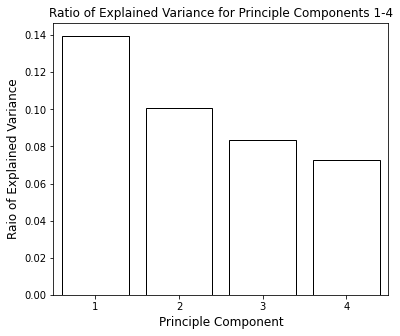

explained variance:
[0.13956136 0.10071428 0.08349706 0.07245814]


In [9]:
vtense_pca, vtense_loadings = apply_pca(token_dp, 0, 1, components=4)

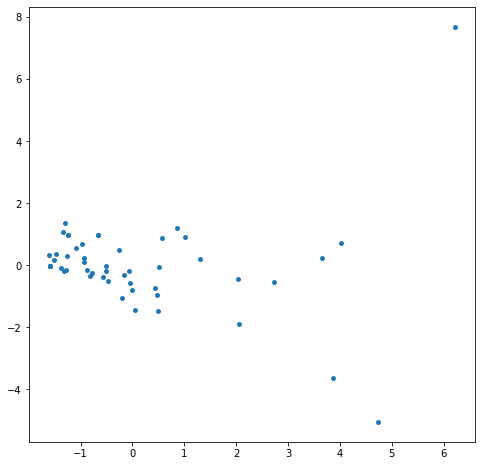

In [10]:
fig, ax = plt.subplots(figsize=(8, 8))
x, y = (vtense_pca['PC1'], vtense_pca['PC2'])
ax.scatter(x, y, s=15)

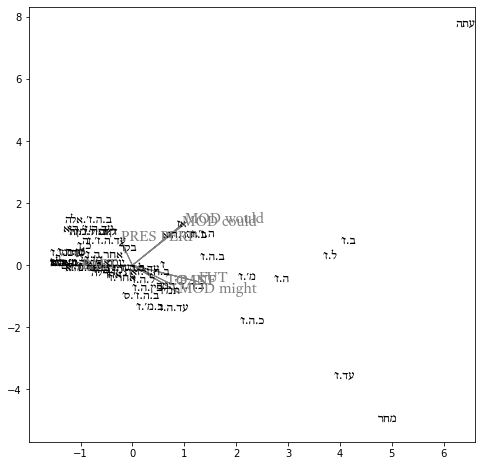

In [24]:
fig, ax = plt.subplots(figsize=(8, 8))

s = 70
x, y = (vtense_pca.iloc[:,0], vtense_pca.iloc[:,1])
ax.scatter(x, y, facecolor=[], s=2)

texts = []
for lex_tok in vtense_pca.index:
    tx, ty = vtense_pca.loc[idx[lex_tok]][:2]
    show_lex = get_display(lex_tok)
    texts.append(plt.text(tx, ty, show_lex, size=12, 
                          fontfamily='SBL Biblit'))
offsets = {}
top_loadings = vtense_loadings.abs().sum().sort_values(ascending=False).index[:8]
texts = []
for feature in top_loadings:
    x_off, y_off, size = offsets.get(feature, (0,0,15)) # config offsets / size
    fx, fy = vtense_loadings[feature][:2] * 2
    plt.arrow(0, 0, fx, fy, color='#808080', linewidth=1, head_width=0)
    show_text = get_display(feature) # handle bidirectional
    texts.append(plt.text(fx+x_off, fy+y_off, show_text, color='#808080', size=size, fontfamily='SBL Biblit'))
    
    
out.plot('tense_PCA')

## PCA Analysis (with Fisher's)

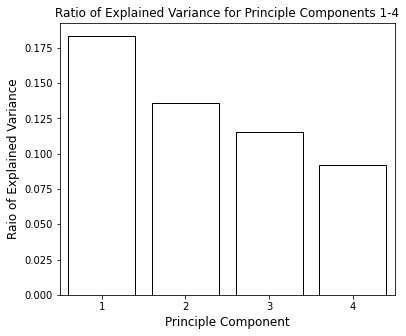

explained variance:
[0.18342296 0.13566469 0.11505337 0.09185457]


In [12]:
vtense_pca2, vtense_loadings2 = apply_pca(token_fs, 0, 1, components=4)

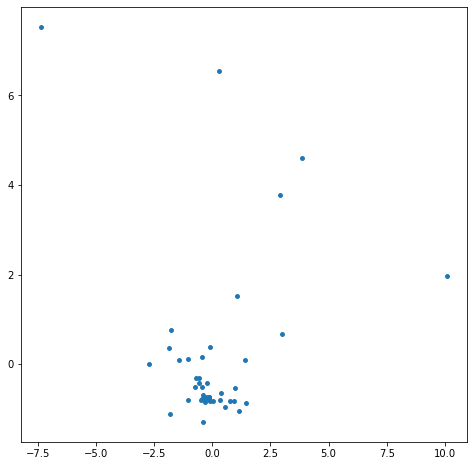

In [13]:
fig, ax = plt.subplots(figsize=(8, 8))
x, y = (vtense_pca2['PC1'], vtense_pca2['PC2'])
ax.scatter(x, y, s=15)

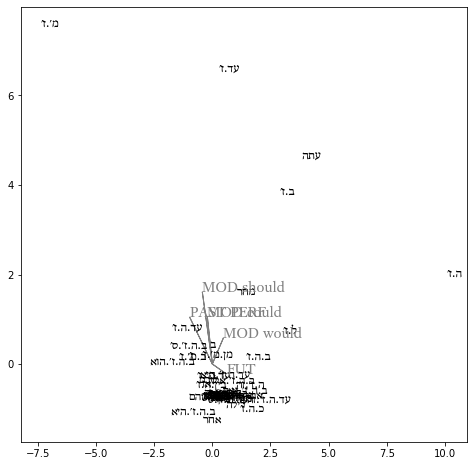

In [14]:
fig, ax = plt.subplots(figsize=(8, 8))

s = 70
x, y = (vtense_pca2.iloc[:,0], vtense_pca2.iloc[:,1])
ax.scatter(x, y, facecolor=[], s=2)

texts = []
for lex_tok in vtense_pca2.index:
    tx, ty = vtense_pca2.loc[idx[lex_tok]][:2]
    show_lex = get_display(lex_tok)
    texts.append(plt.text(tx, ty, show_lex, size=12, 
                          fontfamily='SBL Biblit'))
#adjust_text(texts)
#out.plot('pca2_durVSloc_TENSE_text')

offsets = {}
top_loadings2 = vtense_loadings2.abs().sum().sort_values(ascending=False).index[:5]
texts = []
for feature in top_loadings2:
    x_off, y_off, size = offsets.get(feature, (0,0,15)) # config offsets / size
    fx, fy = vtense_loadings2[feature][:2] * 2
    plt.arrow(0, 0, fx, fy, color='#808080', linewidth=1, head_width=0)
    show_text = get_display(feature) # handle bidirectional
    texts.append(plt.text(fx+x_off, fy+y_off, show_text, color='#808080', size=size, fontfamily='SBL Biblit'))

## With Demonstratives (generally)

In [15]:
df_sg.demon_type.value_counts()

THAT    327
THIS    149
Name: demon_type, dtype: int64

In [16]:
df_sg.columns

Index(['verse', 'book', 'booksuper', 'canon_part', 'period', 'times_etcbc',
       'times_utf8', 'times_utf8d', 'times_POS', 'TA Heads', 'function',
       'quality', 'name', 'text', 'n_times', 'lex_token', 'is_advb', 'tense',
       'verb', 'verbform', 'verb_stem', 'verb_etcbc', 'verb_utf8', 'verb_text',
       'clause', 'sentence', 'cl_rela', 'domain', 'genre', 'gendom', 'cl_kind',
       'verbtense', 'clargs', 'has_objc', 'has_cmpl', 'has_oc', 'vt_order',
       'PP', 'front_etcbc', 'front', 'unmodified', 'APPO', 'DEF', 'ORDN',
       'ØPP', 'GP', 'QUANT', 'PL', 'NUM', 'PARA', 'DEMON', 'demon_type',
       'ADJV', 'TIMEAPPO', 'SPEC', 'SFX3', 'SFX', 'DU', 'SFX1', 'SFX2', 'ADVB',
       'CARDC'],
      dtype='object')

In [17]:
demon_ct = df_sg[df_sg.DEMON == 1].pivot_table(
    index=['front_etcbc', 'demon_type'],
    columns=['verbtense'],
    aggfunc='size',
    fill_value=0,
)

demon_ct

verbtense               ?PRES  FUT  IMPV  MOD could  MOD shall  PAST  \
front_etcbc demon_type                                                 
<D          THAT            0    0     0          0          0     0   
            THIS            1    0     0          0          1    14   
>XR/        THAT            0    1     0          0          0     0   
            THIS            0    0     0          0          0     3   
B           THAT            0   61     1          1         41   140   
            THIS            0    3     0          0          6     7   
K           THIS            0    0     0          0          0     1   
L+PNH/      THAT            0    0     0          0          0     1   
MN          THAT            0    0     0          0          0     1   
            THIS            0    1     0          0          0     0   
advb        THIS            0    0     0          0          0     0   
Ø           THAT            0    0     0          0          1     2   
            THIS            0    7     1          0          2     3   

verbtense               PAST PERF  PAST PROG  PRES  PRES PERF  PRES PERF PROG  \
front_etcbc demon_type                                                          
<D          THAT                3          0     0          1               0   
            THIS                1          0    18         18               0   
>XR/        THAT                0          0     0          0               0   
            THIS                0          0     0          0               0   
B           THAT                1          2     4          1               0   
            THIS                0          0     3          3               1   
K           THIS                0          0     0          2               0   
L+PNH/      THAT                0          0     0          0               0   
MN          THAT                0          0     0          0               0   
            THIS                0          0     0          0               0   
advb        THIS                0          0     1          1               0   
Ø           THAT                0          0     0          0               0   
            THIS                0          0     2         11               0   

verbtense               PRES PROG  
front_etcbc demon_type             
<D          THAT                0  
            THIS                0  
>XR/        THAT                0  
            THIS                0  
B           THAT                0  
            THIS                1  
K           THIS                0  
L+PNH/      THAT                0  
MN          THAT                0  
            THIS                0  
advb        THIS                0  
Ø           THAT                0  
            THIS                0

In [18]:
df_sg[
    (df_sg.verbtense == 'PRES')
    & (df_sg.demon_type == 'THAT')
][['verse', 'clause']]

,verse,clause
node,,
450606,Joshua 20:6,אֲשֶׁ֥ר יִהְיֶ֖ה בַּיָּמִ֣ים הָהֵ֑ם
468695,Isaiah 7:18,וְהָיָ֣ה׀ בַּיֹּ֣ום הַה֗וּא
488574,Zephaniah 1:9,הַדֹּולֵ֛ג עַל־הַמִּפְתָּ֖ן בַּיֹּ֣ום הַה֑וּא
489435,Zechariah 8:6,כִּ֣י יִפָּלֵ֗א בְּעֵינֵי֙ שְׁאֵרִית֙ הָעָ֣ם ה...


## Tense + Verbform + Modifiers

In [19]:
modi_ct = df_sg.pivot_table(
    index=['verbform', 'verbtense'],
    values=['DEF', 'ORDN', 'QUANT', 'PL', 'NUM', 'DEMON', 'SFX', 'unmodified'],
    aggfunc='sum',
    fill_value=0,
)

modi_ct

DEF  DEMON  NUM  ORDN   PL  QUANT  SFX  unmodified
verbform verbtense                                                         
ptcp     FUT               7      1    0     0    0      0    0           3
         MOD is to         2      0    1     0    1      0    0           0
         MOD shall         3      2    0     0    0      0    0           0
         MOD would         2      0    0     0    0      0    0           0
         PAST             12      6    1     1    7      2    2           3
         PAST PROG         4      2    0     1    1      0    0           0
         PRES             49      4    0     2    5     10    3          10
         PRES PART         6      0    0     0    1      2    0           3
         PRES PERF         0      0    0     0    1      0    1           1
         PRES PERF PROG    1      1    0     0    3      1    0           0
         PRES PROG         9      1    0     0    1      0    1           0
qtl      FUT               2      0    1     0    1      0    0           6
         IMPV              0      0    0     0    0      0    0           0
         MOD could         1      1    1     0    1      0    0           0
         MOD may           1      0    0     0    1      1    0           0
         MOD shall         1      0    0     0    0      0    0           1
         MOD should        1      0    1     0    1      0    0           0
         MOD would         0      0    0     0    0      0    0           0
         PAST            104     57   72    17  104     18   36          29
         PAST PERF        11      4    8     1   10      1    3           1
         PAST PROG         0      0    1     0    0      0    0           0
         PRES             31      5    0     0    5     11    3           6
         PRES PART         2      0    0     0    0      1    0           0
         PRES PERF        64     28    6     1   13      6    3          16
         PRES PERF PROG    0      0    0     0    0      0    0           1
wayq     ?PAST             1      0    1     0    1      1    0           0
         ?PAST question    0      0    0     0    0      0    0           1
         ?PRES             1      1    0     0    0      0    0           0
         MOD shall         1      0    0     0    0      0    0           0
         PAST            213    106   89    23   91     30    6          21
         PAST PERF         0      0   12     0    1      0    1           0
         PRES             14     11    0     0    0      1    0           1
         PRES PART         0      0    0     0    0      0    0           0
         PRES PERF        11      9    1     0    0      1    0           0
wqtl     FUT              28     19    6     1    9      5    3           8
         FUT PROG          1      0    0     1    0      0    0           0
         IMPV              6      1    1     0    1      0    0           0
         MOD can           0      0    0     0    0      0    0           1
         MOD lest          0      0    0     0    0      0    0           1
         MOD let           4      0    0     1    1      2    0           0
         MOD may           2      0    1     1    1      0    0           3
         MOD must          1      0    0     1    0      0    0           0
         MOD shall        65     17   19    11   28      6    2           9
         PAST              2      1    2     0    5      4    1           0
         PAST PERF         1      0    0     0    0      0    0           0
         PRES              3      1    0     0    1      0    0           0
         PRES PERF         0      0    1     0    1      0    0           0
         TO INF            0      0    1     0    1      0    0           0
yqtl     FUT              80     53    7     3   38     10   20          62
         HAB used to       1      0    0     0    0      0    0           0
         IMPV              5      1    0     0    1      1    1          

In [20]:
modi_fs, modi_odds = sig.apply_fishers(modi_ct, 0, 1)

In [22]:
df_highlighter(modi_fs, rule='fishers')

# With Tagged Tenses

In [32]:
tense_advbs = df_sg[
    (df_sg.is_advb == 1)
    & (df_sg.front.isin(['Ø', 'advb']))
]

tense_advbs.shape

(591, 63)

In [34]:
# get counts about which adverbs are being tagged as what
lex_tense_ct = tense_advbs.pivot_table(
    index=['TA Heads'],
    columns=['tense'],
    aggfunc='size',
    fill_value=0,
)

lex_tense_ct = lex_tense_ct.loc[lex_tense_ct.sum(1).sort_values(ascending=False).index] 

lex_tense_ct

tense,FUT,PAST,PRES
TA Heads,,,
\texthebrew{עתה},0,0,349
\texthebrew{מחר},32,0,0
\texthebrew{אמש},0,4,0
\texthebrew{אתמול},0,1,0
\texthebrew{תמול},0,1,0


In [53]:
# first look at it with adverbs only

at_counts = tense_advbs.pivot_table(
    index=['tense'],
    columns=['verbform'],
    aggfunc='size',
    fill_value=0,
)

at_counts.drop('infc', axis=1, inplace=True)

# sort
at_counts = at_counts.loc[at_counts.sum(1).sort_values(ascending=False).index]
at_counts = at_counts[at_counts.sum().sort_values(ascending=False).index]

out.table(
    at_counts,
    'advb_tense_ct',
    caption='Tense and Hebrew Verb Collocation Frequencies (adverbs)'
)

at_counts

verbform,yqtl,qtl,impv,ptcp,wqtl,wayq
tense,,,,,,
PRES,45,40,3,3,0,0
FUT,19,0,5,3,2,0
PAST,1,3,0,0,0,1


In [54]:
at_pr = at_counts.div(at_counts.sum(1), 0).round(2)

out.table(
    at_pr,
    'advb_tense_pr',
    caption='Tense and Hebrew Verb Collocation Proportions (adverbs)'
)

at_pr

verbform,yqtl,qtl,impv,ptcp,wqtl,wayq
tense,,,,,,
PRES,0.49,0.44,0.03,0.03,0.00,0.0
FUT,0.66,0.00,0.17,0.10,0.07,0.0
PAST,0.20,0.60,0.00,0.00,0.00,0.2


#### Now look across non-adverbial versions

In [39]:
tense_np = df_sg[
    (df_sg.is_advb == 0)
    & (df_sg.function == 'simultaneous')
]

In [128]:
np_ct = df_sg[df_sg.is_advb == 0].pivot_table(
    index=['tense'],
    columns=['verbform'],
    aggfunc='size',
    fill_value=0,
)

np_ct.drop(['infc', 'infa'], axis=1, inplace=True)

# sort in accord with the adverb DF
np_ct = np_ct.loc[at_pr.index]
np_ct = np_ct[at_pr.columns]

out.table(
    np_ct,
    'np_tense_ct',
    caption='Tense and Hebrew Verb Collocation Frequencies (NP-based adverbials)'
)

np_ct

verbform,yqtl,qtl,impv,ptcp,wqtl,wayq
tense,,,,,,
PRES,30,62,9,51,7,15
FUT,79,1,3,5,31,0
PAST,2,43,0,5,1,89


In [138]:
np_pr = np_ct.div(np_ct.sum(1), 0).round(2)

out.table(
    np_pr,
    'np_tense_pr',
    caption='Tense and Hebrew Verb Collocation Proportions (NP-based adverbials)'
)

np_pr

verbform,yqtl,qtl,impv,ptcp,wqtl,wayq
tense,,,,,,
PRES,0.17,0.36,0.05,0.29,0.04,0.09
FUT,0.66,0.01,0.03,0.04,0.26,0.00
PAST,0.01,0.31,0.00,0.04,0.01,0.64


In [152]:
# how much more frequent is weqatal future than in adverb set?

wqtl_diff = np_pr.loc['FUT']['wqtl'] - at_pr.loc['FUT']['wqtl']

out.number(wqtl_diff*100, 'wqtl_diff')

wqtl_diff

0.19

In [131]:
out.number(
    np_pr['wayq']['PAST']*100,
    'NP_past_wayq_perc'
)

In [92]:
df_sg[
    (df_sg.tense == 'FUT')
    & (df_sg.verbform == 'qtl')
][['verse', 'clause']]

,verse,clause
node,,
486871,Amos 4:7,וְגַ֣ם אָנֹכִי֩ מָנַ֨עְתִּי מִכֶּ֜ם אֶת־הַגֶּ֗...


In [133]:
df_sg[
    (df_sg.tense == 'PAST')
    & (df_sg.verbform == 'wqtl')
][['verse', 'clause']]

,verse,clause
node,,
463020,1_Kings 13:3,וְנָתַן֩ בַּיֹּ֨ום הַה֤וּא מֹופֵת֙


In [123]:
df_sg[
    (df_sg.tense == 'PAST')
    & (df_sg.verbform == 'yqtl')
][['verse', 'clause']]

,verse,clause
node,,
466014,2_Kings 8:22,אָ֛ז תִּפְשַׁ֥ע לִבְנָ֖ה בָּעֵ֥ת הַהִֽיא׃
487727,Micah 2:8,וְאֶתְמ֗וּל עַמִּי֙ לְאֹויֵ֣ב יְקֹומֵ֔ם
514113,2_Chronicles 21:10,אָ֣ז תִּפְשַׁ֥ע לִבְנָ֛ה בָּעֵ֥ת הַהִ֖יא מִתַּ...


In [126]:
df_sg[
    (df_sg.tense == 'PRES')
    & (df_sg.verbform == 'wqtl')
][['verse', 'clause']]

,verse,clause
node,,
438757,Leviticus 10:19,וְאָכַ֤לְתִּי חַטָּאת֙ הַיֹּ֔ום
445474,Deuteronomy 4:39,וְיָדַעְתָּ֣ הַיֹּ֗ום
445924,Deuteronomy 9:3,וְיָדַעְתָּ֣ הַיֹּ֗ום
446141,Deuteronomy 11:2,וִֽידַעְתֶּם֮ הַיֹּום֒
454886,1_Samuel 9:19,וַאֲכַלְתֶּ֥ם עִמִּ֖י הַיֹּ֑ום
485723,Hosea 4:5,וְכָשַׁלְתָּ֣ הַיֹּ֔ום
508890,Nehemiah 4:16,וְהָֽיוּ־לָ֧נוּ הַלַּ֛יְלָה מִשְׁמָ֖ר


In [132]:
df_sg[
    (df_sg.tense == 'PAST')
    & (df_sg.verbform == 'ptcp')
][['verse', 'clause']]

,verse,clause
node,,
431172,Genesis 32:22,וְה֛וּא לָ֥ן בַּלַּֽיְלָה־הַה֖וּא בַּֽמַּחֲנֶֽה׃
445518,Deuteronomy 5:5,אָ֠נֹכִי עֹמֵ֨ד בֵּין־יְהוָ֤ה וּבֵֽינֵיכֶם֙ בּ...
449561,Joshua 8:25,הַנֹּ֨פְלִ֜ים בַּיֹּ֤ום הַהוּא֙
452861,Judges 14:4,וּבָעֵ֣ת הַהִ֔יא פְּלִשְׁתִּ֖ים מֹשְׁלִ֥ים בְּ...
509070,Nehemiah 6:17,גַּ֣ם׀ בַּיָּמִ֣ים הָהֵ֗ם מַרְבִּ֞ים חֹרֵ֤י יְ...


In [134]:
df_sg[
    (df_sg.tense == 'FUT')
    & (df_sg.verbform == 'ptcp')
][['verse', 'clause']]

,verse,clause
node,,
434491,Exodus 9:18,הִנְנִ֤י מַמְטִיר֙ כָּעֵ֣ת מָחָ֔ר בָּרָ֖ד כָּב...
434581,Exodus 10:4,כִּ֛י הִנְנִ֨י מֵבִ֥יא מָחָ֛ר אַרְבֶּ֖ה בִּגְב...
435450,Exodus 17:9,מָחָ֗ר אָנֹכִ֤י נִצָּב֙ עַל־רֹ֣אשׁ הַגִּבְעָ֔ה
448778,Joshua 1:11,כִּ֞י בְּעֹ֣וד׀ שְׁלֹ֣שֶׁת יָמִ֗ים אַתֶּם֙ עֹֽ...
456382,1_Samuel 19:11,מָחָ֖ר אַתָּ֥ה מוּמָֽת׃
464624,1_Kings 22:25,הִנְּךָ֥ רֹאֶ֖ה בַּיֹּ֣ום הַה֑וּא
505645,Esther 5:12,וְגַם־לְמָחָ֛ר אֲנִ֥י קָֽרוּא־לָ֖הּ עִם־הַמֶּֽ...
513809,2_Chronicles 18:24,הִנְּךָ֥ רֹאֶ֖ה בַּיֹּ֣ום הַה֑וּא


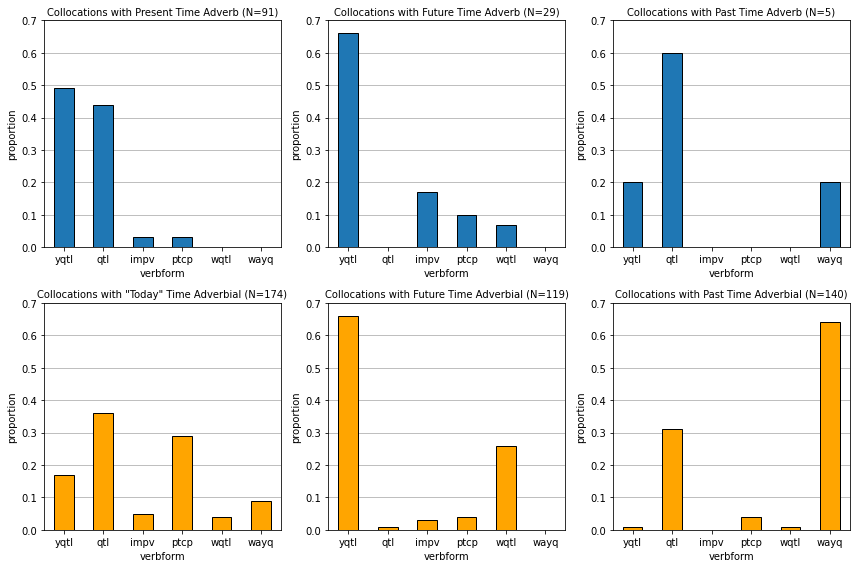

In [150]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs = axs.ravel()

tensenames = {'PRES':'Present', 'FUT': 'Future', 'PAST': 'Past'}


i = 0 
for table, kind in ([at_pr, 'Adverb'], [np_pr, 'Adverbial']):
    for tense in table.index:
        ax = axs[i]
        i += 1
        data = table.loc[tense]
        if kind == 'Adverb':
            ct_data = at_counts.loc[tense]
        else:
            ct_data = np_ct.loc[tense]
        tensename = tensenames[tense]
        kwargs = {}
        if tensename == 'Present' and kind == 'Adverbial':
            tensename = '"Today"'
        
        if kind == 'Adverbial':
            kwargs['color'] = 'orange'
            
        data.plot(ax=ax, kind='bar', edgecolor='black', **kwargs)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
        ax.set_title(f'Collocations with {tensename} Time {kind} (N={ct_data.sum()})', size=10)
        ax.set_ylabel('proportion')
        ax.set_ylim((0, 0.7))
        ax.grid(True, axis='y')
        ax.set_axisbelow(True)
fig.tight_layout()

out.plot(
    'advb_np_prs'
)